<a href="https://colab.research.google.com/github/NovaDileep/mainproject/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import dlib
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
img=cv2.imread('/content/drive/MyDrive/sad.webp',cv2.IMREAD_COLOR)

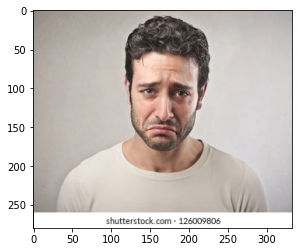

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

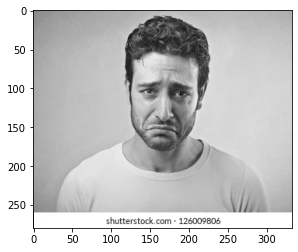

In [ ]:
grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#face=detector(grayimg)
plt.imshow(grayimg,cmap='gray')

In [ ]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2021-04-17 03:55:04--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  70.7MB/s    in 0.9s    

2021-04-17 03:55:04 (70.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



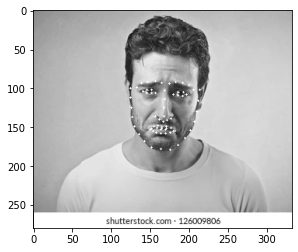

In [ ]:
predictor=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")   #landmark detector
detector=dlib.get_frontal_face_detector()                                 #face detector
face=detector(grayimg)    #rectangles[[(65, 77) (169, 181)]]

for points in face:
  x1,y1=points.left(),points.top()
  x2,y2=points.right(),points.bottom()
  landmarks=predictor(grayimg,points)
  mypoints=[]
  for n in range(68):
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    mypoints.append([x,y])
    cv2.circle(grayimg,(x,y),1,(255,255,255),cv2.FILLED)
  mypoints=np.array(mypoints)  
plt.imshow(grayimg,cmap='gray') 
#print(mypoints)  

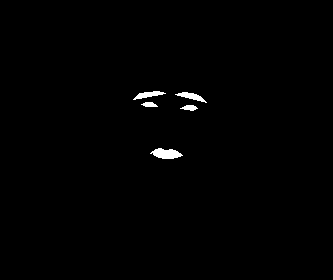

In [ ]:
mask=np.zeros_like(grayimg)
lefteye=mypoints[36:42]
lefteyemask=cv2.fillPoly(mask,[lefteye],(255,255,255))
righteye=mypoints[42:48]
righteyemask=cv2.fillPoly(mask,[righteye],(255,255,255))
lefteyebrow=mypoints[17:22]
lefteyebrowmask=cv2.fillPoly(mask,[lefteyebrow],(255,255,255))
righteyebrow=mypoints[22:27]
righteyebrowmask=cv2.fillPoly(mask,[righteyebrow],(255,255,255))
lip=mypoints[48:61]
lipmask=cv2.fillPoly(mask,[lip],(255,255,255))
cv2_imshow(mask)
#bbox=cv2.boundingRect(pt)
#x,y,w,h=bbox
#imgcrop=grayimg[x:x+h,y:y+w]
#imgcrop=cv2.resize(imgcrop,(0,0),None,8,8)
#cv2_imshow(imgcrop)